In [1]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [3]:
oneplus_reviews=[]

In [4]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [5]:
reviews = list(set(oneplus_reviews))

In [6]:
reviews

["\nAfter reading a lot of geeky reviews on YouTube and portals, I bought Oneplus7t. Pls, note I have been using OnePlus from last many years now so my expectations were clear. My experience with the device says that most of the reviews or unboxing things are influenced. Pls, note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for free. So pls don't go by them blindly. Go for users reviews who bought them with their own money. So I am writing my 5 days experience with the phone.I am not a gamer or a geek. A regular user who wants to do all the office work on the phone, social media, blogging and vlogging, etc.The last OnePlus phone I was using was Oneplus 5 and was quite happy with it until it screen got broken and replacement cost was higher than the selling price of the device itself.The day it arrived from Amazon I opened it with a lot of excitement which continued till I have held it in my hands.Here are the issues:1. Weight: It weigh

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akshay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
reviews = pd.DataFrame(reviews)

In [9]:
reviews

,0
0,\nAfter reading a lot of geeky reviews on YouT...
1,\nI received One Plus 7T 2 days back. I will d...
2,"\nThis phone has great performance, good camer..."
3,\nDetailed review --Design - 4/5+Reduced notch...
4,\nAwesome experience..best in class camera... ...
5,\nTHIS IS ONE OF THE WORST PHONE I HAVE EVER P...
6,"\nYou can also go to my youtube channel - ""Cur..."
7,\nMy first one+7t & its make me so sad. I rece...
8,\nNo earphone jack\n
9,\nA One plus user.Oneplus One -> Oneplus 3T ->...


In [10]:
reviews.rename({0 : 'review'} , axis = 1 , inplace = True )

In [11]:
reviews

,review
0,\nAfter reading a lot of geeky reviews on YouT...
1,\nI received One Plus 7T 2 days back. I will d...
2,"\nThis phone has great performance, good camer..."
3,\nDetailed review --Design - 4/5+Reduced notch...
4,\nAwesome experience..best in class camera... ...
5,\nTHIS IS ONE OF THE WORST PHONE I HAVE EVER P...
6,"\nYou can also go to my youtube channel - ""Cur..."
7,\nMy first one+7t & its make me so sad. I rece...
8,\nNo earphone jack\n
9,\nA One plus user.Oneplus One -> Oneplus 3T ->...


In [12]:
reviews =[Text.strip() for Text in reviews.review]

In [13]:
reviews = [Text for Text in reviews if Text]

In [14]:
text=' '.join(reviews)

In [15]:
text

'After reading a lot of geeky reviews on YouTube and portals, I bought Oneplus7t. Pls, note I have been using OnePlus from last many years now so my expectations were clear. My experience with the device says that most of the reviews or unboxing things are influenced. Pls, note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for free. So pls don\'t go by them blindly. Go for users reviews who bought them with their own money. So I am writing my 5 days experience with the phone.I am not a gamer or a geek. A regular user who wants to do all the office work on the phone, social media, blogging and vlogging, etc.The last OnePlus phone I was using was Oneplus 5 and was quite happy with it until it screen got broken and replacement cost was higher than the selling price of the device itself.The day it arrived from Amazon I opened it with a lot of excitement which continued till I have held it in my hands.Here are the issues:1. Weight: It weighed

In [16]:
len(text)

9539

In [17]:
import re

In [18]:
text = re.sub('http://\S+|https://\S+', '', text)

In [19]:
text = re.sub('!+(?=.*\!)','',text)

In [20]:
text = re.sub("[0-9" "]+"," ",text)

In [21]:
text = re.sub("[^A-Za-z" "]+"," ",text)

In [22]:
text = re.sub(r'\d+', '', text)

In [23]:
len(text)

9062

In [25]:
no_punc_text= text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'After reading a lot of geeky reviews on YouTube and portals I bought Oneplus t Pls note I have been using OnePlus from last many years now so my expectations were clear My experience with the device says that most of the reviews or unboxing things are influenced Pls note I have bought it with my own money unlike leading reviewers or unboxing video geeks who get it for free So pls don t go by them blindly Go for users reviews who bought them with their own money So I am writing my days experience with the phone I am not a gamer or a geek A regular user who wants to do all the office work on the phone social media blogging and vlogging etc The last OnePlus phone I was using was Oneplus and was quite happy with it until it screen got broken and replacement cost was higher than the selling price of the device itself The day it arrived from Amazon I opened it with a lot of excitement which continued till I have held it in my hands Here are the issues Weight It weighed too much I felt like 

In [26]:
from nltk.tokenize import word_tokenize

In [27]:
text_tokens = word_tokenize(no_punc_text)

In [28]:
text_tokens

['After',
 'reading',
 'a',
 'lot',
 'of',
 'geeky',
 'reviews',
 'on',
 'YouTube',
 'and',
 'portals',
 'I',
 'bought',
 'Oneplus',
 't',
 'Pls',
 'note',
 'I',
 'have',
 'been',
 'using',
 'OnePlus',
 'from',
 'last',
 'many',
 'years',
 'now',
 'so',
 'my',
 'expectations',
 'were',
 'clear',
 'My',
 'experience',
 'with',
 'the',
 'device',
 'says',
 'that',
 'most',
 'of',
 'the',
 'reviews',
 'or',
 'unboxing',
 'things',
 'are',
 'influenced',
 'Pls',
 'note',
 'I',
 'have',
 'bought',
 'it',
 'with',
 'my',
 'own',
 'money',
 'unlike',
 'leading',
 'reviewers',
 'or',
 'unboxing',
 'video',
 'geeks',
 'who',
 'get',
 'it',
 'for',
 'free',
 'So',
 'pls',
 'don',
 't',
 'go',
 'by',
 'them',
 'blindly',
 'Go',
 'for',
 'users',
 'reviews',
 'who',
 'bought',
 'them',
 'with',
 'their',
 'own',
 'money',
 'So',
 'I',
 'am',
 'writing',
 'my',
 'days',
 'experience',
 'with',
 'the',
 'phone',
 'I',
 'am',
 'not',
 'a',
 'gamer',
 'or',
 'a',
 'geek',
 'A',
 'regular',
 'user',
 '

In [29]:
len(text_tokens)

1717

In [30]:
from nltk.corpus import stopwords

In [31]:
my_stop_words=stopwords.words('english')

In [32]:
no_stop_tokens=[word for word in text_tokens if word not in my_stop_words]

In [33]:
no_stop_tokens

['After',
 'reading',
 'lot',
 'geeky',
 'reviews',
 'YouTube',
 'portals',
 'I',
 'bought',
 'Oneplus',
 'Pls',
 'note',
 'I',
 'using',
 'OnePlus',
 'last',
 'many',
 'years',
 'expectations',
 'clear',
 'My',
 'experience',
 'device',
 'says',
 'reviews',
 'unboxing',
 'things',
 'influenced',
 'Pls',
 'note',
 'I',
 'bought',
 'money',
 'unlike',
 'leading',
 'reviewers',
 'unboxing',
 'video',
 'geeks',
 'get',
 'free',
 'So',
 'pls',
 'go',
 'blindly',
 'Go',
 'users',
 'reviews',
 'bought',
 'money',
 'So',
 'I',
 'writing',
 'days',
 'experience',
 'phone',
 'I',
 'gamer',
 'geek',
 'A',
 'regular',
 'user',
 'wants',
 'office',
 'work',
 'phone',
 'social',
 'media',
 'blogging',
 'vlogging',
 'etc',
 'The',
 'last',
 'OnePlus',
 'phone',
 'I',
 'using',
 'Oneplus',
 'quite',
 'happy',
 'screen',
 'got',
 'broken',
 'replacement',
 'cost',
 'higher',
 'selling',
 'price',
 'device',
 'The',
 'day',
 'arrived',
 'Amazon',
 'I',
 'opened',
 'lot',
 'excitement',
 'continued',
 '

In [34]:
len(no_stop_tokens)

1146

In [35]:
lower =[Text.lower() for Text in no_stop_tokens]

In [36]:
from nltk.stem import PorterStemmer

In [37]:
ps=PorterStemmer()

In [38]:
stem_token = [ps.stem(text) for text in lower ]

In [39]:
nlp =spacy.load('en_core_web_sm')

In [40]:
doc=nlp(' '.join(lower))

In [41]:
doc

after reading lot geeky reviews youtube portals i bought oneplus pls note i using oneplus last many years expectations clear my experience device says reviews unboxing things influenced pls note i bought money unlike leading reviewers unboxing video geeks get free so pls go blindly go users reviews bought money so i writing days experience phone i gamer geek a regular user wants office work phone social media blogging vlogging etc the last oneplus phone i using oneplus quite happy screen got broken replacement cost higher selling price device the day arrived amazon i opened lot excitement continued till i held hands here issues weight it weighed much i felt like holding brick and thick when i hold one hand minutes i get deep red pit hand due blood circulation camera then i go conference i tried clicking pictures picture quality come well still i thought may light background previous experiences i could believe good so i continued clicking pictures really missed detailing as zoom make b

In [42]:
lemmas= [text.lemma_ for text in doc]

In [43]:
stops = ['-PRON-' , 'youtube' , 'channel']

In [44]:
lemmas =[word for word in lemmas if word not in stops]

In [45]:
len(lemmas)

1141

In [46]:
clean_lemmas=' '.join(lemmas)
clean_lemmas

'after read lot geeky review portal I buy oneplus pls note I use oneplus last many year expectation clear my experience device say review unbox thing influence pls note I buy money unlike lead reviewer unbox video geek get free so pls go blindly go user review buy money so I write day experience phone I gamer geek a regular user want office work phone social medium blogge vlogge etc the last oneplus phone I use oneplus quite happy screen get break replacement cost high selling price device the day arrive amazon I open lot excitement continue till I hold hand here issue weight it weigh much I feel like hold brick and thick when I hold one hand minute I get deep red pit hand due blood circulation camera then I go conference I try click picture picture quality come well still I think may light background previous experience I could believe good so I continue click picture really miss detailing as zoom make blurred I click magazine cover picture oneplus mp camera pic quality natural good i

In [47]:
clean_tokens = word_tokenize(clean_lemmas)

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewsscv=cv.fit_transform(clean_tokens)

In [49]:
vals = pd.Series(cv.vocabulary_.values())

In [50]:
word_list = pd.Series(cv.vocabulary_.keys())

In [51]:
freq_words = pd.DataFrame({'words' : word_list , 'frequency' : vals})

In [52]:
freq_words

,words,frequency
0,after,3
1,read,360
2,lot,251
3,geeky,177
4,review,374
...,...,...
494,wireless,487
495,worry,491
496,bluetooth,52
497,connection,95


In [53]:
freq_words.sort_values(by='words', ascending=False)

,words,frequency
108,zoom,498
324,your,497
370,you,496
13,year,495
35,write,494
...,...,...
121,all,4
0,after,3
219,add,2
458,adaptor,1


In [54]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [55]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
analyzer = SentimentIntensityAnalyzer()

In [56]:
score_clean_tweets = analyzer.polarity_scores(clean_lemmas)
score_clean_tweets

{'neg': 0.069, 'neu': 0.74, 'pos': 0.19, 'compound': 0.9995}

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). positive sentiment : (compound score >= 0.05) neutral sentiment : (compound score > -0.05) and (compound score < 0.05) negative sentiment : (compound score <= -0.05)

# from here we get an idea that the overall sentiment in these reviews are positive because the compound score is greater than 0.05

In [58]:
emotion_lexicon = pd.read_csv('C:/Users/Akshay/Downloads/Afinn.csv', encoding="ISO-8859-1")

In [59]:
emotion_lexicon

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [60]:
emo_words = emotion_lexicon ['word'].tolist()

In [61]:
emo_review = [word for word in clean_tokens if word in emo_words]

In [62]:
emo_rev = pd.DataFrame(emo_review , columns = ['word'])

In [63]:
emo_rev

,word
0,clear
1,free
2,want
3,happy
4,excitement
...,...
91,top
92,great
93,worry
94,good


In [64]:
emotions_in_review = pd.merge(emo_rev , emotion_lexicon , on = "word")

In [65]:
emotions_in_review

,word,value
0,clear,1
1,clear,1
2,clear,1
3,clear,1
4,free,1
...,...,...
91,sad,-2
92,defect,-3
93,pay,-1
94,worry,-3


In [66]:
# Sentiment score of the whole review
emotions_in_review['value'].describe()

count    96.000000
mean      1.239583
std       1.918030
min      -3.000000
25%       0.500000
50%       2.000000
75%       3.000000
max       4.000000
Name: value, dtype: float64

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

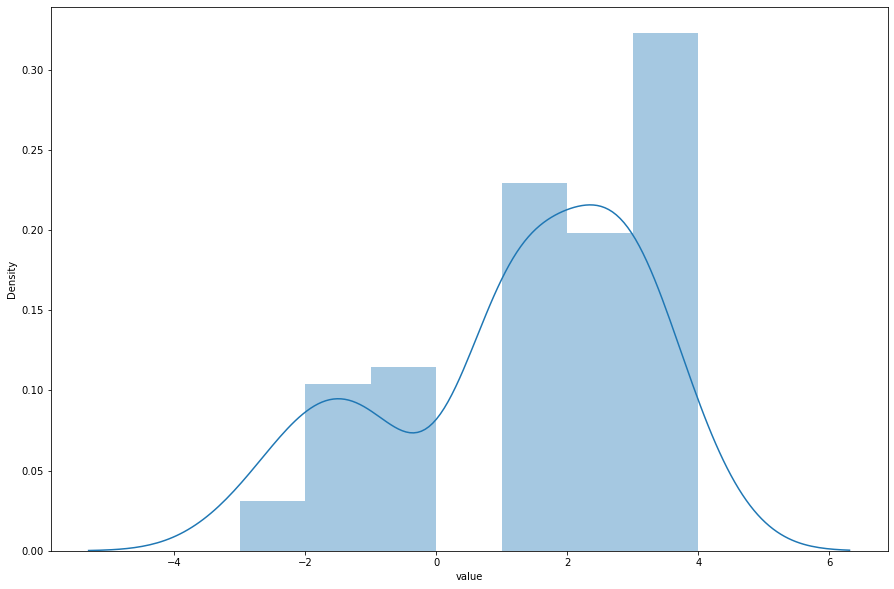

In [67]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(emotions_in_review['value'])

In [70]:
pstv_words = []

p = open('C:/Users/Akshay/Downloads/positive-words.txt')
for word in p.read().split():
    pstv_words.append(word)

# Positve words in Amazon review of oneplus phone

In [71]:
positive_emotions = [word for word in emo_review if word in pstv_words]

In [72]:
positive_emotions

['clear',
 'free',
 'happy',
 'excitement',
 'like',
 'good',
 'good',
 'welcome',
 'clear',
 'good',
 'like',
 'clear',
 'recommend',
 'trust',
 'recommend',
 'excellent',
 'amazing',
 'stunning',
 'amazing',
 'good',
 'good',
 'great',
 'good',
 'great',
 'smart',
 'good',
 'amazing',
 'clear',
 'awesome',
 'good',
 'love',
 'please',
 'protect',
 'benefit',
 'good',
 'happy',
 'win',
 'recommend',
 'please',
 'good',
 'good',
 'beautiful',
 'improvement',
 'good',
 'like',
 'good',
 'free',
 'top',
 'like',
 'like',
 'great',
 'helpful',
 'useful',
 'please',
 'like',
 'love',
 'top',
 'great',
 'good',
 'stable']

In [74]:
neg_words = []

f = open('C:/Users/Akshay/Downloads/negative-words.txt')
for word in f.read().split():
    neg_words.append(word)

# Negative words in Amazon review of oneplus phone

In [75]:
negative_emotions = [word for word in emo_review if word in neg_words]

In [76]:
negative_emotions

['miss',
 'disappointment',
 'problem',
 'miss',
 'mess',
 'bad',
 'please',
 'hard',
 'disappointed',
 'poor',
 'mess',
 'please',
 'waste',
 'please',
 'sad',
 'defect',
 'problem',
 'worry']

# As we can see the number of negative words are less compared to the positive ones also the mean of the sentiment scores are positive , so we can conclude that the overall sentiment of the amazon review of the oneplus phone is Positive